In [1]:
from ultralytics import YOLO
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import CocoDetection
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import torch.nn as nn
from torchvision.models import resnet18
from torch.utils.data import Dataset
from PIL import Image
import json
import torchvision.transforms.v2 as T 
from torchvision.models.detection.backbone_utils import BackboneWithFPN
from torchvision.models.detection import FasterRCNN
import torch.nn.functional as F
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2 
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import matplotlib.pyplot as plt
import time

In [2]:
names=[
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
    'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
  ]

### One Stage Model

In [3]:
# Load a YOLOv8 model (you can also use 'yolov8s.pt', 'yolov8m.pt', etc.)
model = YOLO('yolo11n.pt')  # or 'yolov8s.pt', 'yolov8m.pt', etc.
model.train(
    data='data.yaml',  # path to your data.yaml
    epochs=100
    imgsz=640,
    batch=16,
    device=0
)

New https://pypi.org/project/ultralytics/8.3.220 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.218 🚀 Python-3.12.6 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, o

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797658c70d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.02

results_dict: {'metrics/precision(B)': 0.8571999447197384, 'metrics/recall(B)': 0.8359195543365742, 'metrics/mAP50(B)': 0.8939113393410482, 'metrics/mAP50-95(B)': 0.7428123612338415, 'fitness': 0.7428123612338415}

result already provide by ultralytics

In [7]:
model = YOLO('runs/detect/train3/weights/best.pt')  



0: 640x544 1 sink, 17.8ms
Speed: 2.9ms preprocess, 17.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 544)


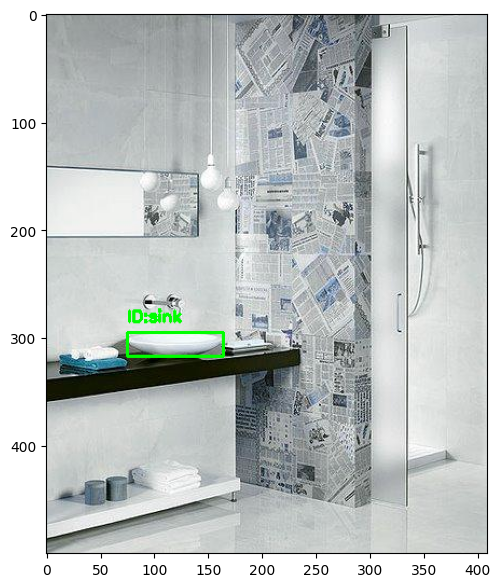

In [10]:
img = cv2.imread('coco128/images/val2017/000000000590.jpg')
# start = time.time()
result = model.predict(img)
# end = time.time()
# fps = end - start 
# print(f'speed: {fps}')
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.figure(figsize=(12,7))
plt.imshow(img)


0: 448x640 1 potted plant, 1 sink, 1 clock, 106.7ms
Speed: 4.4ms preprocess, 106.7ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


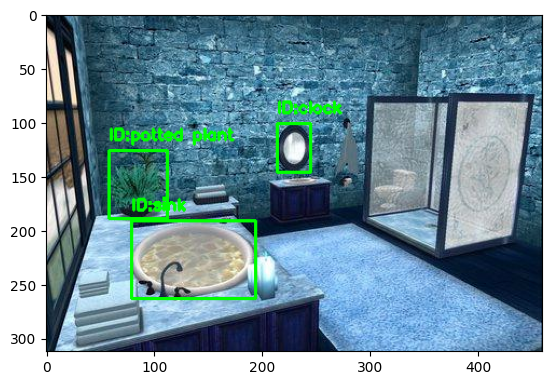

In [64]:
img = cv2.imread('coco128/images/val2017/000000000560.jpg')
result = model.predict(img)
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)

# Clock is wrong class but shape it likely to be clock that why model think it will be clock 


0: 448x640 1 motorcycle, 13.6ms
Speed: 2.3ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


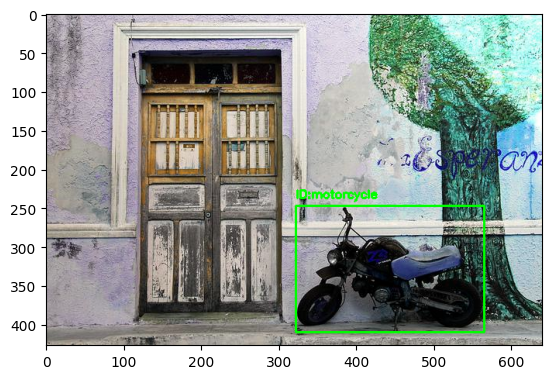

In [66]:
img = cv2.imread('coco128/images/val2017/000000000629.jpg')
result = model.predict(img)
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)


0: 448x640 1 car, 1 cat, 21.4ms
Speed: 2.5ms preprocess, 21.4ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)


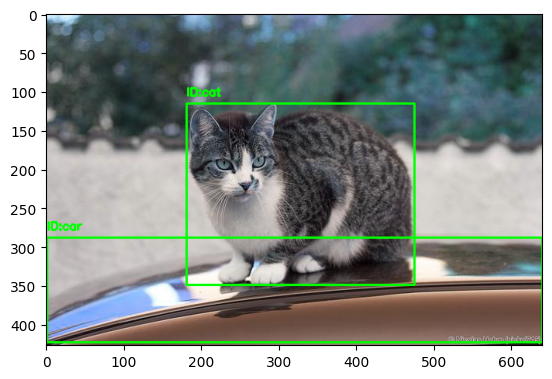

In [67]:
img = cv2.imread('coco128/images/val2017/000000000650.jpg')
result = model.predict(img)
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)


0: 448x640 1 airplane, 21.3ms
Speed: 3.3ms preprocess, 21.3ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


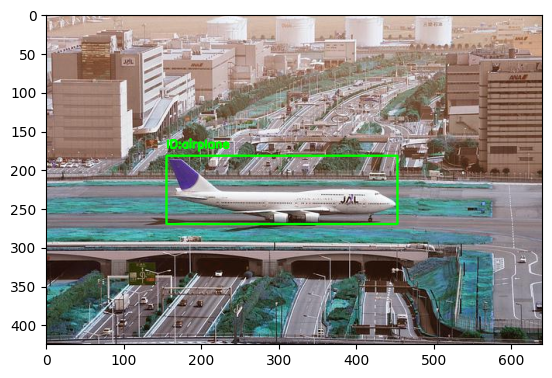

In [68]:
img = cv2.imread('coco128/images/val2017/000000000540.jpg')
result = model.predict(img)
for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
    x1,y1,x2,y2 = map(int,box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f"ID:{names[int(label)]}", 
                (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.5, 
                (0, 255, 0), 2)
plt.imshow(img)

In [11]:
total_params = 0
for param in model.parameters():
    total_params += param.numel() 
print(f'Model size :{total_params}')


Model size :2616248


In [12]:
!nvidia-smi

Sun Oct 26 08:46:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:84:00.0 Off |                  N/A |
| 26%   42C    P8             27W /  250W |     306MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# Prepare dataset for Faster R-CNN training
from torch.utils.data import DataLoader
import torch.optim as optim

class FasterRCNNDataset(Dataset):
    """Dataset class compatible with Faster R-CNN training"""
    def __init__(self, images_path, labels_path, transforms=None):
        self.images_path = images_path
        self.labels_path = labels_path
        self.transforms = transforms
        self.image_files = sorted([f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.images_path, img_name)
        
        # Load image
        image = Image.open(img_path).convert('RGB')
        image_tensor = transforms.ToTensor()(image)
        
        # Load labels
        label_name = img_name.replace('.jpg', '.txt').replace('.png', '.txt')
        label_path = os.path.join(self.labels_path, label_name)
        
        boxes = []
        labels = []
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        class_id = int(parts[0]) + 1  # Faster R-CNN uses 1-indexed (0 is background)
                        x_center, y_center, width, height = map(float, parts[1:5])
                        
                        # Convert to absolute coordinates
                        img_width, img_height = image.size
                        x1 = (x_center - width / 2) * img_width
                        y1 = (y_center - height / 2) * img_height
                        x2 = (x_center + width / 2) * img_width
                        y2 = (y_center + height / 2) * img_height
                        
                        boxes.append([x1, y1, x2, y2])
                        labels.append(class_id)
        
        # Convert to tensors
        if len(boxes) == 0:
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)
        else:
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)
        
        target = {
            'boxes': boxes,
            'labels': labels,
            'image_id': torch.tensor([idx])
        }
        
        return image_tensor, target

# Create training dataset
train_dataset_rcnn = FasterRCNNDataset('coco128/images/train2017/', 'coco128/labels/train2017/')
val_dataset_rcnn = FasterRCNNDataset('coco128/images/val2017//', 'coco128/labels/val2017/')

print(f"Faster R-CNN training dataset: {len(train_dataset_rcnn)} images")

def collate_fn(batch):
    return tuple(zip(*batch))

train_loader_rcnn = DataLoader(
    train_dataset_rcnn,
    batch_size=2,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=0
)
print("DataLoader created")

val_loader_rcnn = DataLoader(
    train_dataset_rcnn,
    batch_size=2,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=0
)
print("DataLoader created")

Faster R-CNN training dataset: 100 images
DataLoader created
DataLoader created


In [7]:
device = 'cuda:3'

In [8]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

# Initialize with pretrained weights for transfer learning
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
faster_rcnn = fasterrcnn_resnet50_fpn(weights=weights)
faster_rcnn = faster_rcnn.to(device)

print("Faster R-CNN model initialized with pretrained weights")
print(f"Model on device: {next(faster_rcnn.parameters()).device}")

# Get model size
faster_rcnn_size = sum(p.numel() for p in faster_rcnn.parameters()) / 1e6
print(f"Faster R-CNN parameters: {faster_rcnn_size:.2f}M")

Faster R-CNN model initialized with pretrained weights
Model on device: cuda:3
Faster R-CNN parameters: 41.76M


In [10]:
# Train Faster R-CNN on COCO128
print("Training Faster R-CNN...")

# Set model to training mode
faster_rcnn.train()

# Optimizer
params = [p for p in faster_rcnn.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Training configuration - SAME AS YOLO FOR FAIR COMPARISON
num_epochs = 20
print(f"Training for {num_epochs} epochs...")

# Track metrics like YOLO for comparison
training_losses = []
training_box_losses = []
training_cls_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0
    num_batches = 0
    
    for images, targets in train_loader_rcnn:
        # Move to device
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        
        # Forward pass
        loss_dict = faster_rcnn(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        # Backward pass
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        epoch_loss += losses.item()

        num_batches += 1
    
    # Update learning rate
    lr_scheduler.step()
    
    avg_loss = epoch_loss / num_batches

    
    training_losses.append(avg_loss)

    
    print(f"Epoch {epoch + 1}/{num_epochs}, Total Loss: {avg_loss:.4f}")

# print("Training completed!")

# Set to evaluation mode
faster_rcnn.eval()


Training Faster R-CNN...
Training for 20 epochs...
Epoch 1/20, Total Loss: 1.1664
Epoch 2/20, Total Loss: 0.8628
Epoch 3/20, Total Loss: 0.6751
Epoch 4/20, Total Loss: 0.5554
Epoch 5/20, Total Loss: 0.4919
Epoch 6/20, Total Loss: 0.4539
Epoch 7/20, Total Loss: 0.4278
Epoch 8/20, Total Loss: 0.4288
Epoch 9/20, Total Loss: 0.4260
Epoch 10/20, Total Loss: 0.4222
Epoch 11/20, Total Loss: 0.4201
Epoch 12/20, Total Loss: 0.4205
Epoch 13/20, Total Loss: 0.4257
Epoch 14/20, Total Loss: 0.4207
Epoch 15/20, Total Loss: 0.4182
Epoch 16/20, Total Loss: 0.4199
Epoch 17/20, Total Loss: 0.4237
Epoch 18/20, Total Loss: 0.4208
Epoch 19/20, Total Loss: 0.4199
Epoch 20/20, Total Loss: 0.4183


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [12]:

# Assume model, valLoader, and device are defined

# 1. Initialize the metric
# Make sure to move the metric itself to the device!
metric = MeanAveragePrecision().to(device) 
# 2. Set model to evaluation mode
faster_rcnn.eval()

# 3. Disable gradient calculation
with torch.no_grad():

    for images, targets in val_loader_rcnn:
        
        # 5. Move images and targets to the correct device
        images = [img.to(device) for img in images]
        # --- THIS IS THE MISSING STEP ---
        # Targets must also be on the same device as the model/predictions
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # 6. Get model predictions
        predictions = faster_rcnn(images)

        # 7. Update the metric
        # --- THIS IS THE CORRECTED LINE ---
        # Use the correct variable 'predictions'
        metric.update(predictions, targets)
# --- End of inference loop ---

# 8. Compute the final mAP scores
print("Calculating final mAP...")
map_results = metric.compute()

print("\nValidation Results:")
print(map_results)

Calculating final mAP...

Validation Results:
{'map': tensor(0.4482), 'map_50': tensor(0.5658), 'map_75': tensor(0.5100), 'map_small': tensor(0.4140), 'map_medium': tensor(0.5055), 'map_large': tensor(0.5349), 'mar_1': tensor(0.3426), 'mar_10': tensor(0.5425), 'mar_100': tensor(0.5538), 'mar_small': tensor(0.4590), 'mar_medium': tensor(0.6028), 'mar_large': tensor(0.6157), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
        82, 84, 85, 87, 88], dtype=torch.int32)}


map 0.5658

## it seams like my model overfitting, it maybe because I use small data that is 100 image for training maybe FastRCNN can not capture it well.

In [24]:
import numpy as np
import time
from torchvision.ops import nms 

In [15]:
temp = iter(val_loader_rcnn)

Speed: 0.12 s per batch
After NMS: 1 boxes kept


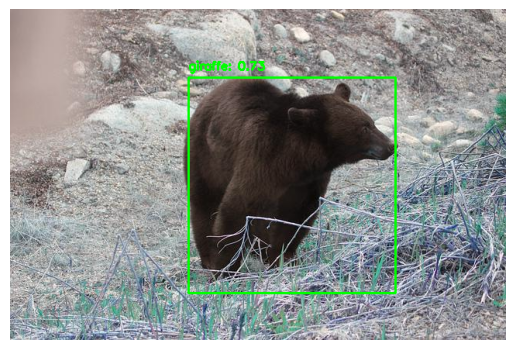

In [25]:
all_predictions = []
all_targets = []

faster_rcnn.eval()

with torch.no_grad():
    img, target = next(temp)
    images = [i.to(device) for i in img]

    # Run inference
    start = time.time()
    predictions = faster_rcnn(images)
    end = time.time()

fps = end - start
print(f"Speed: {fps:.2f} s per batch")

# Take first image
img_np = img[0].permute(1, 2, 0).cpu().numpy()  # (H, W, C)
img_np = (img_np * 255).clip(0, 255).astype(np.uint8)
img_np = np.ascontiguousarray(img_np)

# Get predictions
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']
labels = predictions[0]['labels']

# ====== 🔹 APPLY NMS ======
iou_threshold = 0.5  # adjust for stricter or looser filtering
keep_indices = nms(boxes, scores, iou_threshold)
boxes = boxes[keep_indices].cpu().numpy()
scores = scores[keep_indices].cpu().numpy()
labels = labels[keep_indices].cpu().numpy().astype(np.int32)

print(f"After NMS: {len(boxes)} boxes kept")

# ====== 🔹 DRAW RESULTS ======
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
    text = f"{names[label]}: {score:.2f}"
    cv2.putText(img_np, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show image
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Speed: 0.11 s per batch
After NMS: 2 boxes kept


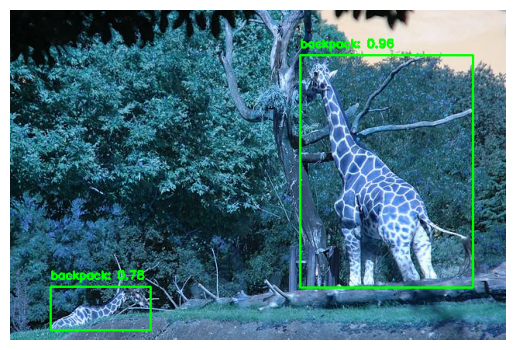

In [26]:
all_predictions = []
all_targets = []

faster_rcnn.eval()

with torch.no_grad():
    img, target = next(temp)
    images = [i.to(device) for i in img]

    # Run inference
    start = time.time()
    predictions = faster_rcnn(images)
    end = time.time()

fps = end - start
print(f"Speed: {fps:.2f} s per batch")

# Take first image
img_np = img[0].permute(1, 2, 0).cpu().numpy()  # (H, W, C)
img_np = (img_np * 255).clip(0, 255).astype(np.uint8)
img_np = np.ascontiguousarray(img_np)

# Get predictions
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']
labels = predictions[0]['labels']

# ====== 🔹 APPLY NMS ======
iou_threshold = 0.5  # adjust for stricter or looser filtering
keep_indices = nms(boxes, scores, iou_threshold)
boxes = boxes[keep_indices].cpu().numpy()
scores = scores[keep_indices].cpu().numpy()
labels = labels[keep_indices].cpu().numpy().astype(np.int32)

print(f"After NMS: {len(boxes)} boxes kept")

# ====== 🔹 DRAW RESULTS ======
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
    text = f"{names[label]}: {score:.2f}"
    cv2.putText(img_np, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show image
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Speed: 0.14 s per batch
After NMS: 20 boxes kept


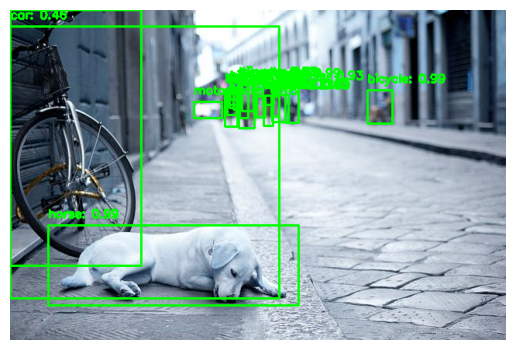

In [27]:
all_predictions = []
all_targets = []

faster_rcnn.eval()

with torch.no_grad():
    img, target = next(temp)
    images = [i.to(device) for i in img]

    # Run inference
    start = time.time()
    predictions = faster_rcnn(images)
    end = time.time()

fps = end - start
print(f"Speed: {fps:.2f} s per batch")

# Take first image
img_np = img[0].permute(1, 2, 0).cpu().numpy()  # (H, W, C)
img_np = (img_np * 255).clip(0, 255).astype(np.uint8)
img_np = np.ascontiguousarray(img_np)

# Get predictions
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']
labels = predictions[0]['labels']

# ====== 🔹 APPLY NMS ======
iou_threshold = 0.5  # adjust for stricter or looser filtering
keep_indices = nms(boxes, scores, iou_threshold)
boxes = boxes[keep_indices].cpu().numpy()
scores = scores[keep_indices].cpu().numpy()
labels = labels[keep_indices].cpu().numpy().astype(np.int32)

print(f"After NMS: {len(boxes)} boxes kept")

# ====== 🔹 DRAW RESULTS ======
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
    text = f"{names[label]}: {score:.2f}"
    cv2.putText(img_np, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show image
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Speed: 0.13 s per batch
After NMS: 2 boxes kept


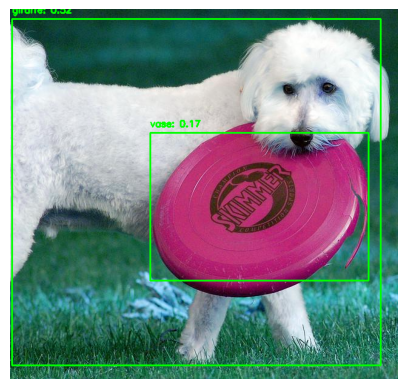

In [28]:
all_predictions = []
all_targets = []

faster_rcnn.eval()

with torch.no_grad():
    img, target = next(temp)
    images = [i.to(device) for i in img]

    # Run inference
    start = time.time()
    predictions = faster_rcnn(images)
    end = time.time()

fps = end - start
print(f"Speed: {fps:.2f} s per batch")

# Take first image
img_np = img[0].permute(1, 2, 0).cpu().numpy()  # (H, W, C)
img_np = (img_np * 255).clip(0, 255).astype(np.uint8)
img_np = np.ascontiguousarray(img_np)

# Get predictions
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']
labels = predictions[0]['labels']

# ====== 🔹 APPLY NMS ======
iou_threshold = 0.5  # adjust for stricter or looser filtering
keep_indices = nms(boxes, scores, iou_threshold)
boxes = boxes[keep_indices].cpu().numpy()
scores = scores[keep_indices].cpu().numpy()
labels = labels[keep_indices].cpu().numpy().astype(np.int32)

print(f"After NMS: {len(boxes)} boxes kept")

# ====== 🔹 DRAW RESULTS ======
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
    text = f"{names[label]}: {score:.2f}"
    cv2.putText(img_np, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show image
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Speed: 0.11 s per batch
After NMS: 6 boxes kept


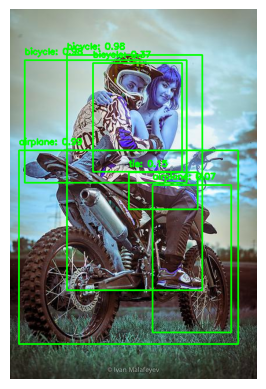

In [29]:
all_predictions = []
all_targets = []

faster_rcnn.eval()

with torch.no_grad():
    img, target = next(temp)
    images = [i.to(device) for i in img]

    # Run inference
    start = time.time()
    predictions = faster_rcnn(images)
    end = time.time()

fps = end - start
print(f"Speed: {fps:.2f} s per batch")

# Take first image
img_np = img[0].permute(1, 2, 0).cpu().numpy()  # (H, W, C)
img_np = (img_np * 255).clip(0, 255).astype(np.uint8)
img_np = np.ascontiguousarray(img_np)

# Get predictions
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']
labels = predictions[0]['labels']

# ====== 🔹 APPLY NMS ======
iou_threshold = 0.5  # adjust for stricter or looser filtering
keep_indices = nms(boxes, scores, iou_threshold)
boxes = boxes[keep_indices].cpu().numpy()
scores = scores[keep_indices].cpu().numpy()
labels = labels[keep_indices].cpu().numpy().astype(np.int32)

print(f"After NMS: {len(boxes)} boxes kept")

# ====== 🔹 DRAW RESULTS ======
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
    text = f"{names[label]}: {score:.2f}"
    cv2.putText(img_np, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show image
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [31]:
total_params = 0
for param in faster_rcnn.parameters():
    total_params += param.numel() 
print(f'Model size :{total_params}')


Model size :41755286


In [33]:
!nvidia-smi

Fri Oct 31 11:59:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:84:00.0 Off |                  N/A |
| 24%   39C    P8             26W /  250W |     160MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

YOLOv11 use less memory and small model and better mAP

YOLOv11 get better speed FPS around 0.4 ms while FastRCNN around  0.12 second

YOLOv11 use less memory because model sctruture more lightweight

In [32]:
torch.save(faster_rcnn.state_dict(), "fasterrcnn_weights.pth")
